In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_save=pd.read_excel("/content/final.xlsx")

In [ ]:
df_save.shape

(306, 164)

In [ ]:
df_save.columns

Index(['Sexe', 'Age', 'Motif(s) d'Admission/Asthénie',
       'Motif(s) d'Admission/Altération de la fonction rénale',
       'Motif(s) d'Admission/HTA', 'Motif(s) d'Admission/Œdème',
       'Motif(s) d'Admission/Diabète',
       'Motif(s) d'Admission/Douleur abdominale', 'Autres Motifs d'Admission',
       'Personnels Médicaux/HTA',
       ...
       'Pathologies/Rétinopathie hypertensive',
       'Pathologies/Rétinopathie diabétique', 'Pathologies/Glaucome',
       'Autres Pathologies', 'Rythme Cardiaque/Sinusal',
       'Rythme Cardiaque/Régulier', 'Trouble de la Repolarisation',
       'Stage de l'IRC', 'Causes Majeure après Diagnostic/HTA',
       'Causes Majeure après Diagnostic/Diabète'],
      dtype='object', length=164)

In [ ]:
print("Les colonnes à valeur manquantes sont :")

for col in df_save.columns:
  if df_save[col].isna().sum() > 0:
    print(f"{col} : {df_save[col].isna().sum()*100/len(df_save)}")

Les colonnes à valeur manquantes sont :
Age : 2.6143790849673203
TA (mmHg)/Systole : 19.934640522875817
TA (mmHg)/Diastole : 19.934640522875817
Poul (bpm) : 22.54901960784314
Glycémie à jeun (taux de Glucose) : 28.431372549019606
Urée (g/L) : 7.516339869281046
Na^+ (meq/L) : 11.437908496732026
K^+ (meq/L) : 9.803921568627452
Ca^2+ (meq/L) : 29.73856209150327
Cl^- (meq/L) : 16.013071895424837
Hb (g/dL) : 16.33986928104575


In [ ]:
#Remplaçons les données par la médiane

for col in df_save.columns:
  if df_save[col].isna().sum() > 0:
    df_save[col].fillna(df_save[col].median(), inplace=True)

<ipython-input-103-0ceb0c7511cd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_save[col].fillna(df_save[col].median(), inplace=True)


In [ ]:
for col in df_save.columns:
  if df_save[col].isna().sum() > 0:
    print(f"{col} : {df_save[col].isna().sum()*100/len(df_save)}")

# Features extraction

In [ ]:
df_save.isna().sum()

,0
Sexe,0
Age,0
Motif(s) d'Admission/Asthénie,0
Motif(s) d'Admission/Altération de la fonction rénale,0
Motif(s) d'Admission/HTA,0
...,...
Rythme Cardiaque/Régulier,0
Trouble de la Repolarisation,0
Stage de l'IRC,0
Causes Majeure après Diagnostic/HTA,0


In [ ]:
df_save.isna().sum()

,0
Sexe,0
Age,0
Motif(s) d'Admission/Asthénie,0
Motif(s) d'Admission/Altération de la fonction rénale,0
Motif(s) d'Admission/HTA,0
...,...
Rythme Cardiaque/Régulier,0
Trouble de la Repolarisation,0
Stage de l'IRC,0
Causes Majeure après Diagnostic/HTA,0


In [ ]:
#Jetons maintenant un coup d'oeil aux colonnes
for col in df_save.columns:

  print(f"{col}")

Sexe
Age
Motif(s) d'Admission/Asthénie
Motif(s) d'Admission/Altération de la fonction rénale
Motif(s) d'Admission/HTA
Motif(s) d'Admission/Œdème
Motif(s) d'Admission/Diabète
Motif(s) d'Admission/Douleur abdominale
Autres Motifs d'Admission
Personnels Médicaux/HTA
Personnels Médicaux/Diabète 1
Personnels Médicaux/Diabète 2
Personnels Médicaux/IRC
Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)
Personnels Médicaux/Ulcère
Personnels Médicaux/Pathologies virales (HB, HC, HIV)
Autres Antécédents Personnels Médicaux
Durée Diabète 1 (mois)
Durée Diabète 2 (mois)
Personnels Chirurgicaux/Appendicectomie
Personnels Chirurgicaux/Césarienne
Personnels Chirurgicaux/Hystérectomie
Autre Antécédent Personnel Chirurgical
Personnels Familiaux/HTA
Personnels Familiaux/Diabète
Autres Antécédents Personnels Familiaux
Enquête Sociale/Tabac
Enquête Sociale/AlNS (+)
Enquête Sociale/Alcool
Enquête Sociale/Phytothérapie traditionnelle
Enquête Sociale/Epice
Enquête Sociale/PEC oui


In [ ]:
num_cols =[
    "Age",
    "TA (mmHg)/Systole",
    "TA (mmHg)/Diastole",
    "Poul (bpm)",
    "Glycémie à jeun (taux de Glucose)",
    "Urée (g/L)",
    "Créatinine (mg/L)",
    "Na^+ (meq/L)",
    "K^+ (meq/L)",
    "Ca^2+ (meq/L)",
    "Cl^- (meq/L)",
    "Hb (g/dL)"
]

In [ ]:
cat_cols= [
    "Sexe",
    "Motif(s) d'Admission/Asthénie",
    "Motif(s) d'Admission/Altération de la fonction rénale",
    "Motif(s) d'Admission/HTA",
    "Motif(s) d'Admission/Œdème",
    "Motif(s) d'Admission/Diabète",
    "Motif(s) d'Admission/Douleur abdominale",
    "Autres Motifs d'Admission",
    "Personnels Médicaux/HTA",
    "Personnels Médicaux/Diabète 1",
    "Personnels Médicaux/Diabète 2",
    "Personnels Médicaux/IRC",
    "Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)",
    "Personnels Médicaux/Ulcère",
    "Personnels Médicaux/Pathologies virales (HB, HC, HIV)",
    "Autres Antécédents Personnels Médicaux",
    "Durée Diabète 1 (mois)",
    "Durée Diabète 2 (mois)",
    "Personnels Chirurgicaux/Appendicectomie",
    "Personnels Chirurgicaux/Césarienne",
    "Personnels Chirurgicaux/Hystérectomie",
    "Autre Antécédent Personnel Chirurgical",
    "Personnels Familiaux/HTA",
    "Personnels Familiaux/Diabète",
    "Autres Antécédents Personnels Familiaux",
    "Enquête Sociale/Tabac",
    "Enquête Sociale/AlNS (+)",
    "Enquête Sociale/Alcool",
    "Enquête Sociale/Phytothérapie traditionnelle",
    "Enquête Document sans titreSociale/Epice",
    "Enquête Sociale/PEC oui",
    "Enquête Sociale/PEC non",
    "Autres détails de l'Enquête Sociale à Préciser",
    "Début des symptômes (mois)",
    "Symptômes/Fièvre",
    "Symptômes/Frissons",
    "Symptômes/Céphalées",
    "Symptômes/Douleur Lombaire",
    "Symptômes/Dysurie",
    "Symptômes/Oligurie",
    "Symptômes/Diarrhée",
    "Symptômes/Douleur Thoracique",
    "Symptômes/Anorexie",
    "Symptômes/Anémie",
    "Symptômes/Nausées",
    "Symptômes/Douleur abdominale",
    "Symptômes/Articulaire",
    "Symptômes/HTA",
    "Symptômes/Flou visuel",
    "Symptômes/Asthénie",
    "Symptômes/Vomissements",
    "Symptômes/Insomnie",
    "Symptômes/Nycturie",
    "Symptômes/Toux Grave",
    "Symptômes/Détresse Respiratoire",
    "Symptômes/Perte de poids",
    "Symptômes/OMI",
    "Symptômes/Bouffissure du Visage",
    "Autre Symptôme à Notifier",
    "Automédication ?",
    "Evolution de l'Etat Générale/Favorable",
    "Evolution de l'Etat Générale/Pas Favorable",
    "Evolution de l'Etat Générale/Patient Perdu de vue",
    "Etat Général (EG) à l'Admission",
    "Etat Général (EG)/OMI",
    "Etat Général (EG)/Plis de déshydratation",
    "Etat Général (EG)/Muqueuse Bulbaire",
    "Etat Général (EG)/Muqueuse Palpébrale",
    "Sueur",
    "IMC",
    "Diurèse",
    "BU/Leucocytose",
    "BU/Nitrite",
    "BU/Hématurie",
    "BU/Protéinurie",
    "BU/Glucosurie",
    "BU/Albuminuerie",
    "Coloration des Urines",
    "Aspect des Urines",
    "Vibrations Vocales (VV)",
    "Amplification Thoracique",
    "Sonorité Pulmonaire",
    "Murmure Vésiculaire",
    "Autres Détails de l'Examen Pleuropulmonaire",
    "B1 et B2/Réguliers",
    "B1 et B2/Perçu sans souffle",
    "Choc de Pointe/Perçu",
    "Choc de Pointe/Palpé",
    "Pouls Périphériques/Régulier",
    "Présence de bruits surajoutés",
    "TSJ (Signe de Hazer)",
    "RHJ",
    "Mollets souples",
    "OMI/Siégeant au niveau des pieds",
    "OMI/Bilatéral",
    "OMI/Indolores",
    "OMI/Mous",
    "OMI/Douloureux",
    "OMI/Prenant le godet",
    "Hygiène buccodentaire",
    "Langue",
    "Abdomen/Souple",
    "Abdomen/Balloné (et infiltré)",
    "Abdomen/Douloureux",
    "Douleur Epigastrique",
    "Douleur Hypogastrique",
    "Douleur à l'hypochondre",
    "Abdomen/Participe bien à la respiration",
    "Matité des flancs",
    "Hépatomégalie (augmentation du foi)",
    "Points Urétéraux douloureux",
    "Contact Lombaire",
    "Fosse Lombaire/Symétrique",
    "Fosse Lombaire/Douloureux",
    "Présence de Masse Lombaire",
    "Signe de Giordano",
    "Miction (Incontinence Urinaire)/Vue",
    "Miction (Incontinence Urinaire)/Confortable",
    "Miction (Incontinence Urinaire)/Normale",
    "Brûlures mictionnelles",
    "Globe vésical",
    "Douleur pelvienne",
    "Vessie de Lutte",
    "Ballotement Rénal",
    "Conscience",
    "Score de Glasgow (/15)",
    "Motricité",
    "Sensibilité",
    "Convulsions",
    "Protéinurie",
    "Protéinurie à la bandellette urinaire (g/24h)",
    "Anémie",
    "Cholestérol Total",
    "Cholestérol HDL",
    "Cholestérol LDL",
    "Triglycérides",
    "Grosseur Rein Gauche",
    "Grosseur Rein Droit",
    "Calcul Rénal",
    "Kyste",
    "Différenciation des reins",
    "Echogénicité",
    "Pathologies/Rétinopathie hypertensive",
    "Pathologies/Rétinopathie diabétique",
    "Pathologies/Glaucome",
    "Autres Pathologies",
    "Rythme Cardiaque/Sinusal",
    "Rythme Cardiaque/Régulier",
    "Trouble de la Repolarisation",
    "Stage de l'IRC",
    "Causes Majeure après Diagnostic/HTA",
    "Causes Majeure après Diagnostic/Diabète"
]


In [ ]:
#Identifions les colonnes numériques corrélées avec la colonne cible

def eta_squared(numeric_col, category_col):
    # Sous-échantillon avec uniquement les lignes complètes pour ces 2 colonnes
    sub_df = df_save[[numeric_col, category_col]].dropna()

    categories = sub_df[category_col].unique()
    grand_mean = sub_df[numeric_col].mean()

    ss_between = sum([
        len(sub_df[sub_df[category_col] == cat]) *
        (sub_df[sub_df[category_col] == cat][numeric_col].mean() - grand_mean) ** 2
        for cat in categories
    ])
    ss_total = sum((sub_df[numeric_col] - grand_mean) ** 2)

    return ss_between / ss_total if ss_total != 0 else 0




# Cible catégorielle
target_cat_col = "Stage de l'IRC"

# Résultats
print(f"Corrélations numériques fortes avec la variable '{target_cat_col}':\n")
for col in num_cols:
    if col != target_cat_col:
        eta = eta_squared(col, target_cat_col)
        if eta > 0.06:
            print(f"{col} : η² = {eta:.2f} → corrélation forte")


Corrélations numériques fortes avec la variable 'Stage de l'IRC':

Age : η² = 0.17 → corrélation forte
Créatinine (mg/L) : η² = 0.60 → corrélation forte
Na^+ (meq/L) : η² = 0.15 → corrélation forte
Ca^2+ (meq/L) : η² = 0.12 → corrélation forte


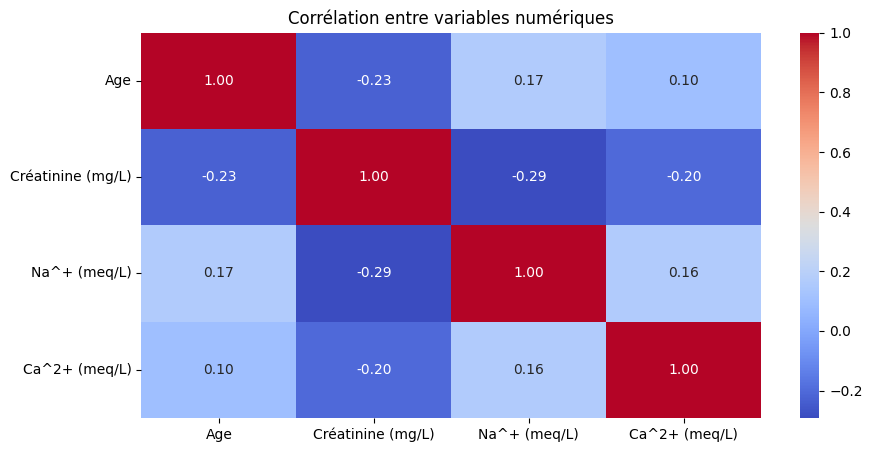

In [ ]:
#Vérifions la corrélation entre ces variables numériques
col=["Age","Créatinine (mg/L)", "Na^+ (meq/L)", "Ca^2+ (meq/L)"]
corr_matrix = df_save[col].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre variables numériques")
plt.show()


A travers ce heatmap, on remarque que les variables numériques ne sont pas corrélées entre elles.

On retient donc comme variables numériques à utiliser :
- Age
- Créatinine (mg/L)
- Na^+ (meq/L)
- Ca^2+ (meq/L)

In [ ]:
#Vérifions la corrélation des vatriables catégorielles avec la colonne cible "Stage de l'IRC"

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    # Créer la matrice de contingence
    confusion_matrix = pd.crosstab(x, y)
    # Calculer le chi-deux et les autres paramètres
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape

    # Vérifier si la statistique du chi-deux est nulle ou si le nombre d'observations est trop faible
    if chi2 == 0 or n == 0 or min(k - 1, r - 1) == 0:
        return 0

    return np.sqrt((chi2 / n) / min(k - 1, r - 1))

# Liste des colonnes catégorielles
stage_irc_col = "Stage de l'IRC"  # La colonne cible

resultats = []

# Comparer "Stage de l'IRC" avec les autres colonnes catégorielles
# Excluding numerical columns that were mistakenly included in cat_cols
for col in cat_cols:
    if col != stage_irc_col and col in df_save.select_dtypes(include=['object', 'category']).columns: # Only consider truly categorical columns
        score = cramers_v(df_save[stage_irc_col], df_save[col])
        if score > 0.5:
            resultats.append((col, score))


# Affichage des colonnes fortement liées à "Stage de l'IRC"
for col, score in resultats:
    print(f"{stage_irc_col} vs {col} : Cramér’s V = {score:.2f}")

Stage de l'IRC vs Choc de Pointe/Perçu : Cramér’s V = 0.52
Stage de l'IRC vs Mollets souples : Cramér’s V = 0.50
Stage de l'IRC vs Anémie : Cramér’s V = 0.53


Nous avons donc les colonnes: **Choc de Pointe/Perçu**,**Mollets souples** et **Anémie** sont le plus corrélés avec la variable cible.

Mais nous garderon aussi la variabble Sexe car d'après les articles, c'est aussi un facteur déterminant

Vérifions si elles sont corrélées entre elles.

In [ ]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape

    if chi2 == 0 or n == 0 or min(k - 1, r - 1) == 0:
        return 0

    return np.sqrt((chi2 / n) / min(k - 1, r - 1))

cols = [
    "Choc de Pointe/Perçu",
    "Mollets souples",
    "Anémie",
]
# Calcul des corrélations entre chaque paire
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        score = cramers_v(df_save[col1], df_save[col2])
        if score > 0.5:
            print(f"{col1} vs {col2} : Cramér’s V = {score:.2f}")


Aucune de ces colonnes ne sont donc corrélées entre elles.

---



In [ ]:
selected_columns = [
    "Choc de Pointe/Perçu",
    "Mollets souples",
    "Anémie",
    "Créatinine (mg/L)",
    "Na^+ (meq/L)",
    "Ca^2+ (meq/L)",
    "Age",
    "Stage de l'IRC",
    "Sexe"
]

# Création du nouveau DataFrame
final_df = df_save[selected_columns]

# Affichage des premières lignes pour vérification
final_df.shape


(306, 9)

In [ ]:
final_df.columns


Index(['Choc de Pointe/Perçu', 'Mollets souples', 'Anémie',
       'Créatinine (mg/L)', 'Na^+ (meq/L)', 'Ca^2+ (meq/L)', 'Age',
       'Stage de l'IRC', 'Sexe'],
      dtype='object')

# Feature Transformation


Le stade MRC est essentiellement déterminé par le **Débit de Filtration Glomérulaire (DFG)** et celui ci est déterminé grâce des forules déjà élaborées dont la plus récente est le CKD-EPI qui est utilisée pour les adultes.


Voici la formule :

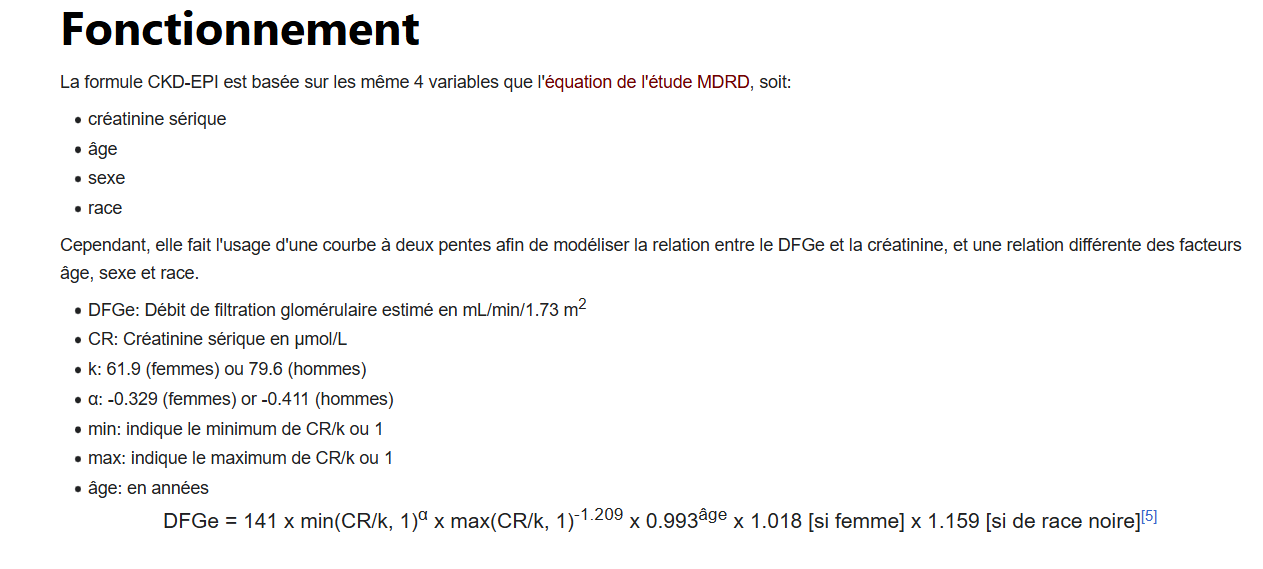


In [ ]:
from typing_extensions import final

def calcul_dfge(row):
    creatinine_mg_L = row['Créatinine (mg/L)']
    age = row['Age']
    sexe = row['Sexe']

    # Conversion mg/L -> µmol/L
    cr = creatinine_mg_L * 88.4

    # Paramètres selon le sexe
    if sexe == 'F':
        k = 61.9
        alpha = -0.329
        sex_factor = 1.018
    else:  # 'M'
        k = 79.6
        alpha = -0.411
        sex_factor = 1.0

    # Calcul min/max, handling zero creatinine
    cr_k = cr / k if k != 0 else 0  # Avoid division by zero if k is 0
    min_ratio = min(cr_k, 1) if cr_k != 0 else 1 # Avoid raising 0 to a negative power
    max_ratio = max(cr_k, 1) if cr_k != 0 else 1  # Avoid raising 0 to a negative power

    # Use np.power to handle 0 raised to negative power more gracefully
    dfge = 141 * np.power(min_ratio, alpha) * np.power(max_ratio, -1.209) * np.power(0.993, age) * sex_factor * 1.159

    return dfge




final_df['DFGe'] = final_df.apply(calcul_dfge, axis=1)

final_df.drop('Créatinine (mg/L)',axis=1,inplace=True)
final_df.drop('Age',axis=1,inplace=True)
final_df.drop('Sexe',axis=1, inplace=True)



<ipython-input-116-b6c78f15c80f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['DFGe'] = final_df.apply(calcul_dfge, axis=1)
<ipython-input-116-b6c78f15c80f>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop('Créatinine (mg/L)',axis=1,inplace=True)
<ipython-input-116-b6c78f15c80f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop('Age',axi

In [ ]:
final_df.columns

Index(['Choc de Pointe/Perçu', 'Mollets souples', 'Anémie', 'Na^+ (meq/L)',
       'Ca^2+ (meq/L)', 'Stage de l'IRC', 'DFGe'],
      dtype='object')

In [ ]:
final_df.head(5)

,Choc de Pointe/Perçu,Mollets souples,Anémie,Na^+ (meq/L),Ca^2+ (meq/L),Stage de l'IRC,DFGe
0,Oui,Oui,Oui,131.0,82.0,CKD 5,0.154131
1,Non,Non,Oui,134.0,92.0,CKD 5,3.847795
2,Non,Non,Oui,139.0,87.0,CKD 5,0.617762
3,Non,Non,Oui,142.0,88.0,CKD 5,0.973388
4,Oui,Non,Oui,139.0,92.0,CKD 5,0.036596


# Normalization and labelization

In [ ]:
final_df.columns

Index(['Choc de Pointe/Perçu', 'Mollets souples', 'Anémie', 'Na^+ (meq/L)',
       'Ca^2+ (meq/L)', 'Stage de l'IRC', 'DFGe'],
      dtype='object')

In [ ]:
final_df.head(10)

,Choc de Pointe/Perçu,Mollets souples,Anémie,Na^+ (meq/L),Ca^2+ (meq/L),Stage de l'IRC,DFGe
0,Oui,Oui,Oui,131.0,82.0,CKD 5,0.154131
1,Non,Non,Oui,134.0,92.0,CKD 5,3.847795
2,Non,Non,Oui,139.0,87.0,CKD 5,0.617762
3,Non,Non,Oui,142.0,88.0,CKD 5,0.973388
4,Oui,Non,Oui,139.0,92.0,CKD 5,0.036596
5,Non,Oui,Oui,130.0,92.0,CKD 5,0.213705
6,Oui,Oui,Oui,133.5,72.4,CKD 5,0.338924
7,Oui,Non,Oui,140.0,87.0,CKD 5,0.215513
8,Non,Oui,Oui,141.0,88.0,CKD 5,0.061410
9,Non,Oui,Oui,123.0,85.0,CKD 5,0.306377


In [ ]:
#Transformer les valeurs catégorielles
cat_cols = ["Choc de Pointe/Perçu", "Mollets souples", "Anémie"]

for col in cat_cols:
    final_df[col] = final_df[col].map({'Oui': 1, 'Non': 0, '1':1, '0':0, 'Aucun': 0})

final_df[cat_cols].head(5)

<ipython-input-121-d2de2746e6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col] = final_df[col].map({'Oui': 1, 'Non': 0, '1':1, '0':0, 'Aucun': 0})
<ipython-input-121-d2de2746e6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col] = final_df[col].map({'Oui': 1, 'Non': 0, '1':1, '0':0, 'Aucun': 0})
<ipython-input-121-d2de2746e6da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Choc de Pointe/Perçu,Mollets souples,Anémie
0,1,1,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,1


In [ ]:
final_df['Stage de l\'IRC'].unique()

array(['CKD 5', 'CKD 2', 'CKD 4', 'CKD 3a', 'CKD 1', 'CKD 3b'],
      dtype=object)

In [ ]:
#Labeliser la target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_df['Stage de l\'IRC'] = le.fit_transform(final_df['Stage de l\'IRC'])
final_df['Stage de l\'IRC'].unique()

<ipython-input-123-e5baf3bbf20d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Stage de l\'IRC'] = le.fit_transform(final_df['Stage de l\'IRC'])


array([5, 1, 4, 2, 0, 3])

In [ ]:
#Standardization

from sklearn.preprocessing import StandardScaler

num_cols = ['Na^+ (meq/L)', 'Ca^2+ (meq/L)', 'DFGe']
scaler = StandardScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])


<ipython-input-124-ccbc336cfbd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[num_cols] = scaler.fit_transform(final_df[num_cols])


In [ ]:
final_df.head(20)

,Choc de Pointe/Perçu,Mollets souples,Anémie,Na^+ (meq/L),Ca^2+ (meq/L),Stage de l'IRC,DFGe
0,1,1,1,-0.992570,-0.904226,5,-0.283643
1,0,0,1,-0.574444,0.084656,5,-0.029120
2,0,0,1,0.122432,-0.409785,5,-0.251695
3,0,0,1,0.540557,-0.310897,5,-0.227189
4,1,0,1,0.122432,0.084656,5,-0.291742
5,0,1,1,-1.131945,0.084656,5,-0.279537
6,1,1,1,-0.644132,-1.853553,5,-0.270909
7,1,0,1,0.261807,-0.409785,5,-0.279413
8,0,1,1,0.401182,-0.310897,5,-0.290032
9,0,1,1,-2.107571,-0.607561,5,-0.273152


# Model

In [ ]:
final_df.shape

(306, 7)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [ ]:
#Split
X = final_df.drop("Stage de l'IRC", axis=1)
y = final_df["Stage de l'IRC"]

# Perform one-hot encoding for categorical features
X = pd.get_dummies(X, columns=['Choc de Pointe/Perçu', 'Mollets souples', 'Anémie'], drop_first=True) # drop_first to avoid multicollinearity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Avant SMOTE
print("Distribution avant SMOTE :", Counter(y_train))

# Appliquer SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Après SMOTE
print("Distribution après SMOTE :", Counter(y_train_res))

Distribution avant SMOTE : Counter({5: 48, 1: 41, 4: 40, 2: 39, 3: 39, 0: 37})
Distribution après SMOTE : Counter({4: 48, 2: 48, 3: 48, 1: 48, 0: 48, 5: 48})


In [ ]:


# Définition de la grille d’hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Création du modèle de base
rf = RandomForestClassifier(random_state=42)

# Recherche des meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train_res, y_train_res)

# Meilleur modèle trouvé
best_rf = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Prédictions sur le jeu de test
y_pred = best_rf.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.73      0.84        11
           2       0.89      0.80      0.84        10
           3       0.69      0.90      0.78        10
           4       0.82      0.90      0.86        10
           5       1.00      0.92      0.96        12

    accuracy                           0.87        62
   macro avg       0.88      0.87      0.87        62
weighted avg       0.89      0.87      0.87        62



# Importance des features

<ipython-input-132-b56369908d97>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=sorted_features, palette="viridis")


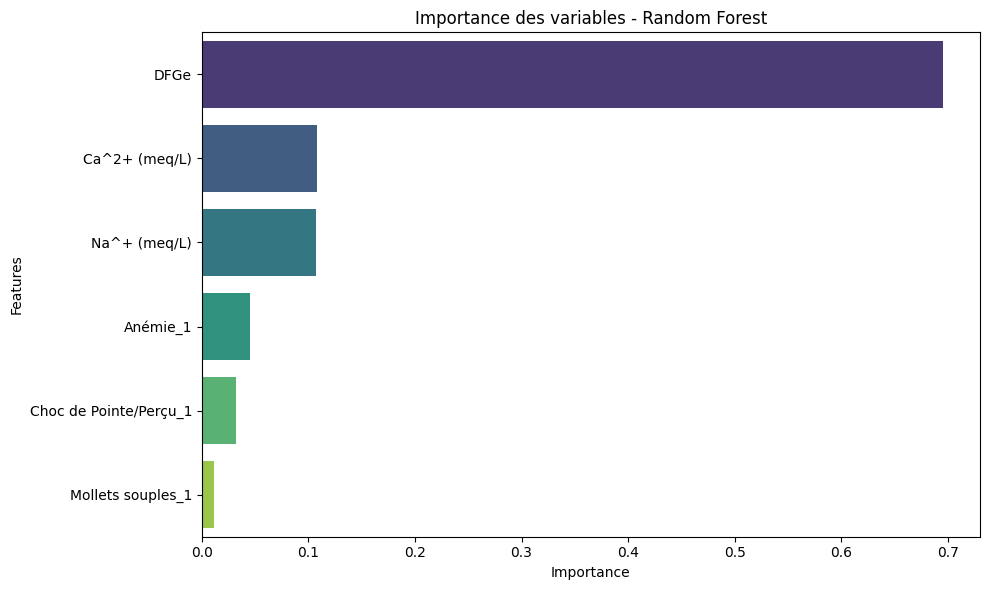

In [ ]:
import pandas as pd
import seaborn as sns

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    sorted_features = [feature_names[i] for i in indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=sorted_features, palette="viridis")
    plt.title("Importance des variables - Random Forest")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

plot_feature_importance(best_rf, X_test.columns)


# Explicabilité

In [ ]:
! pip install shap


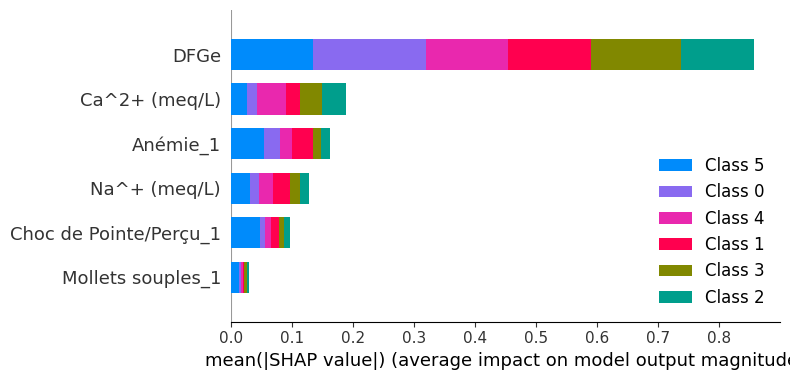

In [ ]:
import shap

# Créer un explainer à partir du modèle Random Forest
explainer = shap.TreeExplainer(best_rf)

# Calculer les valeurs SHAP pour le jeu de test
shap_values = explainer.shap_values(X_test)

# Summary plot (pour multiclass, shap_values est une liste)
shap.summary_plot(shap_values, X_test, plot_type="bar")


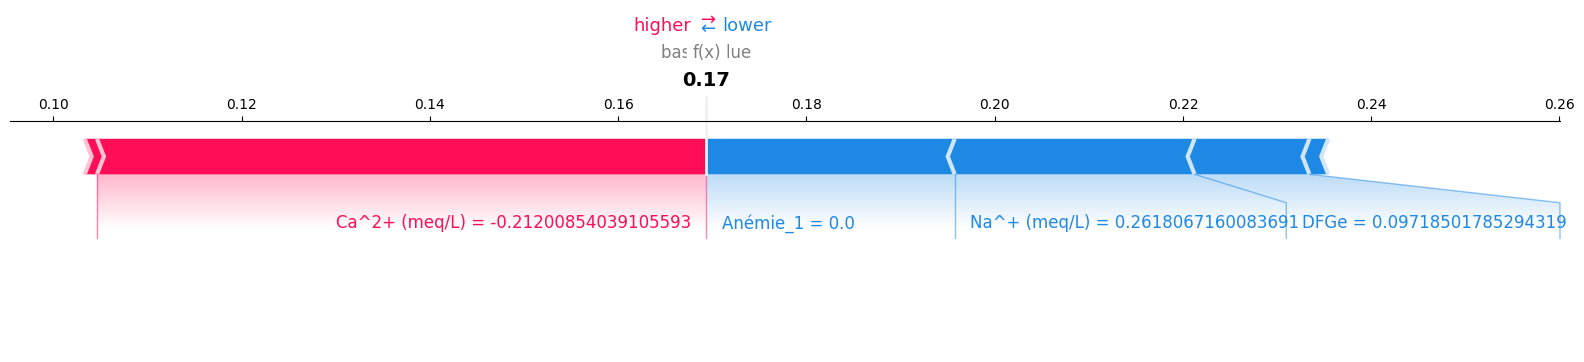

In [ ]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Initialisation JS (pour affichage interactif)
shap.initjs()

# Visualiser une instance (par exemple la 0)
shap.force_plot(
    base_value=explainer.expected_value[0],     # la valeur moyenne
    shap_values=shap_values[0][0],              # impact de chaque feature
    features=X_test.iloc[0],                    # valeurs des features
    matplotlib=True                             # ou False pour affichage web (si notebook)
)


# sauvegarder

In [ ]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(best_rf, 'modele_rf.pkl')

# Sauvegarder le scaler utilisé
joblib.dump(scaler, 'scaler.pkl')

# Sauvegarder le label encoder
joblib.dump(le, 'label_encoder.pkl')

# Sauvegarder les colonnes d'entrée attendues
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']

# prédiction

In [ ]:
import numpy as np
import pandas as pd
import joblib

# Charger les objets sauvegardés
model = joblib.load('modele_rf.pkl')
scaler = joblib.load('scaler.pkl')
le = joblib.load('label_encoder.pkl')
feature_columns = joblib.load('feature_columns.pkl')

def calcul_dfge(creatinine_mg_L, age, sexe):
    cr = creatinine_mg_L * 88.4
    if sexe == 'F':
        k, alpha, sex_factor = 61.9, -0.329, 1.018
    else:
        k, alpha, sex_factor = 79.6, -0.411, 1.0

    cr_k = cr / k if k != 0 else 0
    min_ratio = min(cr_k, 1) if cr_k != 0 else 1
    max_ratio = max(cr_k, 1) if cr_k != 0 else 1

    return 141 * np.power(min_ratio, alpha) * np.power(max_ratio, -1.209) * \
           np.power(0.993, age) * sex_factor * 1.159

def predict_irc_stage(age, sexe, creatinine, na, ca, choc_de_pointe, mollets_souples, anemie):
    dfge = calcul_dfge(creatinine, age, sexe)

    input_data = pd.DataFrame([{
        'Na^+ (meq/L)': na,
        'Ca^2+ (meq/L)': ca,
        'DFGe': dfge,
        'Choc de Pointe/Perçu': 1 if choc_de_pointe in ['Oui', 1] else 0,
        'Mollets souples': 1 if mollets_souples in ['Oui', 1] else 0,
        'Anémie': 1 if anemie in ['Oui', 1] else 0
    }])

    # Mise à l’échelle
    input_data[['Na^+ (meq/L)', 'Ca^2+ (meq/L)', 'DFGe']] = scaler.transform(
        input_data[['Na^+ (meq/L)', 'Ca^2+ (meq/L)', 'DFGe']]
    )

    # Dummy encoding
    input_data = pd.get_dummies(input_data, columns=['Choc de Pointe/Perçu', 'Mollets souples', 'Anémie'])

    # Recréer les colonnes manquantes
    for col in feature_columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[feature_columns]  # Assurer l’ordre

    pred = model.predict(input_data)[0]
    return le.inverse_transform([pred])[0]


In [ ]:
print(predict_irc_stage(
    age=60,
    sexe='M',
    creatinine=12.0,
    na=139,
    ca=4.3,
    choc_de_pointe='Non',
    mollets_souples='Oui',
    anemie='Oui'
))


CKD 5
